In [106]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


>>>  21


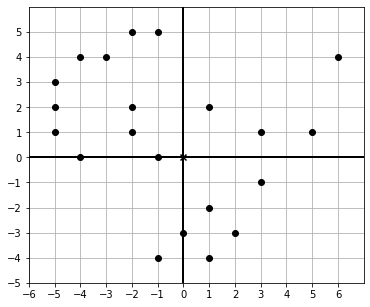

In [107]:
dino_vectors = [
    (6,4), (3,1), (1,2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), 
    (-5, 3), (-5, 2), 
    (-2, 2), (-5, 1),
    (-4, 0), (-2, 1), (-1, 0),
    (0, -3), (-1, -4), (1, -4), (2, -3),
    (1, -2), (3, -1), (5, 1),
]

print('>>> ', len(dino_vectors))
 
draw( Points(*dino_vectors))

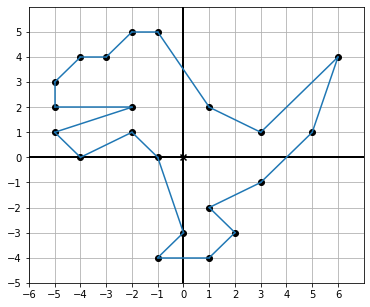

In [108]:
segments = [ 
    Segment(dino_vectors[i], dino_vectors[(i+1)%len(dino_vectors)]) 
    for i in range(len(dino_vectors))
]
draw(
    Points(*dino_vectors), 
    *segments
)


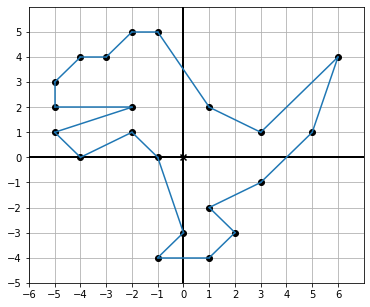

In [109]:
# a better way is to use polygon

draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors),
)

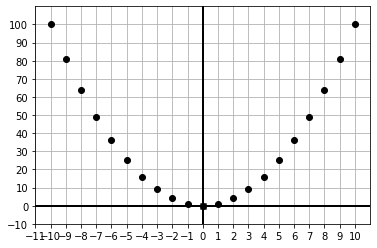

In [110]:
v = [ (x, x**2) for x in range(-10, 11)]

# NOTE: grid(x units, y units)

draw(Points(*v), grid=(1, 10), nice_aspect_ratio=False)

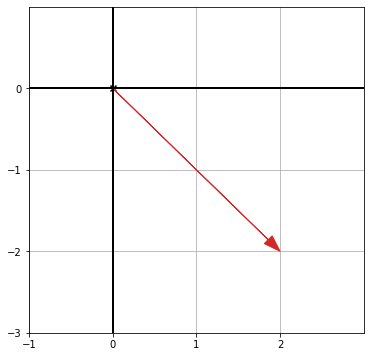

In [111]:
# Draw a point in the plane and the arrow -> (2, -2)

draw(
  Arrow((2, -2))
)

# Vector Arithmetic



## Add v1, v2 

Add `(4, 3)` and `(-1, 1)`


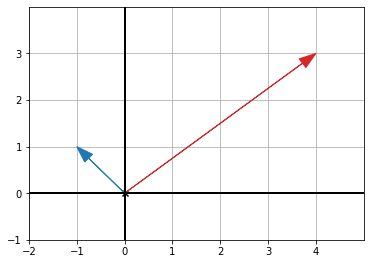

In [112]:
draw(
  Arrow((4, 3), color=red),
  Arrow((-1, 1), color=blue)
)



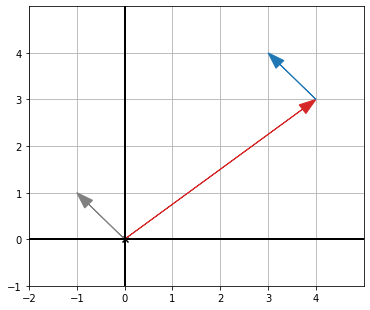

In [113]:
# adding moves the v1 to the end of v2 
draw(
    Arrow((4,3), color=red),
    Arrow((-1, 1), color=gray),
    Arrow((3, 4), (4, 3), color=blue)
)

Now the resultant V from base of A to B' (purple)


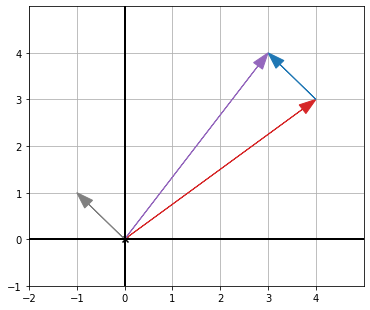

In [114]:
# adding moves the A to the end of B 
draw(
    Arrow((4,3), color=red),
    Arrow((-1, 1), color=gray),  # original (-1, 1) translated
    Arrow((3, 4), (4, 3), color=blue),
    Arrow((3,4), color=purple)
)

In [115]:
def add(v1, v2): 
    return (v1[0] + v2[0], v1[1] + v2[1])


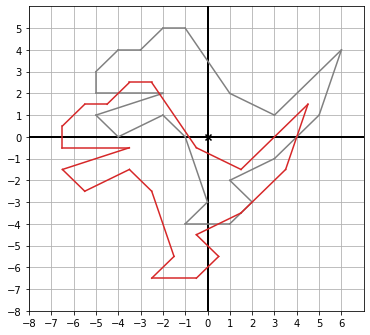

In [116]:
# using the above to translate the dino_vectors

translate_by = (-1.5, -2.5)
dino_translated = [add(translate_by, v) for v in dino_vectors]

draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*dino_translated, color=red)
)

# Vector components and Length



Vector (4,3) can be split into 2 e.g. 

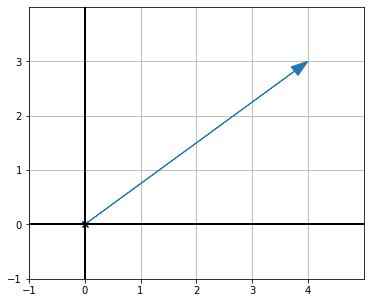

In [117]:
draw(
    Arrow((4,3), color=blue)
)



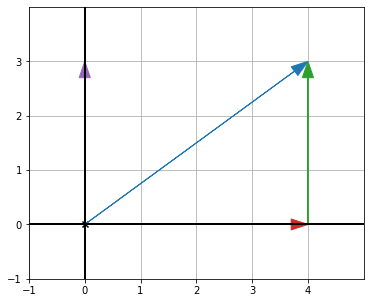

In [118]:
# can be split as (4, 0) and (0, 3) as follow

draw(
    Arrow((4, 3), color=blue),
    Arrow((4, 0), color=red),
    Arrow((0, 3), color=purple),
    Arrow((4, 3),(4,0), color=green),  # (0,3) moved to  (4,0)
)

In [119]:
# from the above, we can compute length of a vector using
# pythagoream theorm

from math import sqrt
def length(v):
  return sqrt(v[0]**2 + v[1]**2)

length((4,3))  # sqrt(4^2 + 3^2) = 5.0

5.0

##  Multiplying Vector by a scalar

Multiply is repeated addition ... so each component gets added N times


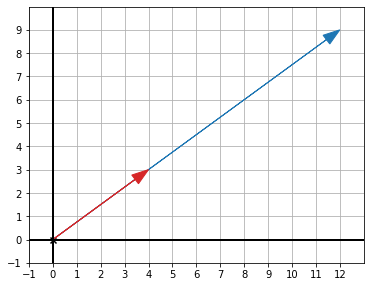

In [120]:
def scale(v, n): 
    return (v[0] * n, v[1] *n)

scale((4,3), 2)   # should give us (8, 6)

draw(
    Arrow(scale((4,3), 3), color=blue),
    Arrow((4, 3), color=red),   # orignal -> red
)

### Use scale `-1` to change the direction of the vector




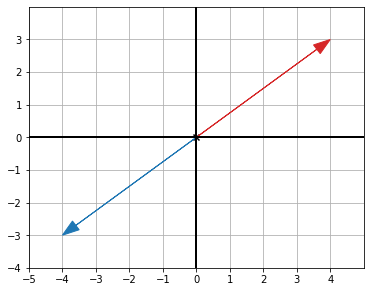

In [121]:

draw(
    Arrow(scale((4,3), -1), color=blue),
    Arrow((4, 3), color=red),   # orignal -> red
)

## Subtraction, displacement  & distance

Subraction of `a - b` can be treated as `a + -1(b)`. Lets plot that ...

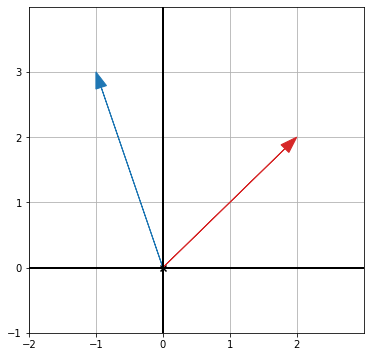

v, w and -w


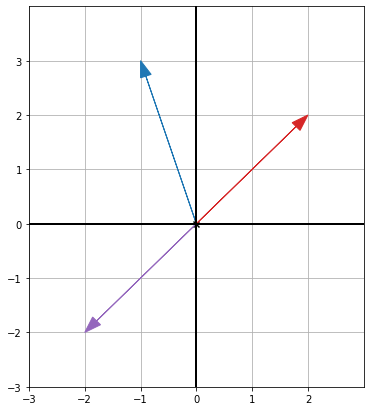

In [122]:
v = (-1, 3) # blue
w = (2, 2)  # red

draw(
  Arrow(v, color=blue),
  Arrow(w, color=red),
)

# subtract v - w 
# v remains as is 
print("v, w and -w")

draw(
  Arrow(v, color=blue),
  Arrow(w, color=red),
  Arrow(scale(w, -1), color=purple),
)




v + -w; red is the resultant vector


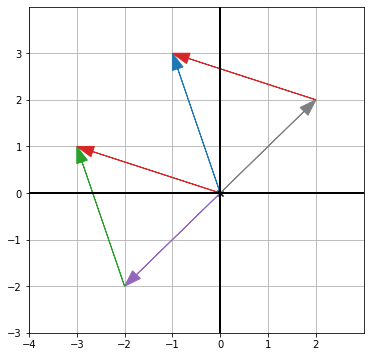

In [123]:
print("v + -w; red is the resultant vector")
wInv = scale(w, -1)
resultV = add(v, wInv)
draw(
  Arrow(v, color=blue),  # v original 
  Arrow(w, color=gray),  # w 
  Arrow(wInv, color=purple),
  Arrow(add(v, wInv), wInv, color=green),  # translated to wInv
  Arrow(resultV, color=red), # result
  Arrow(add(resultV, w), w, color=red),
)




Think about of the above as `gray` + `red` = `blue` So ... 
`red` = `blue` - `gray` 


In [124]:
# Exercise 2.6: 
# If 
# the vector u = (−2, 0), 
# the vector v = (1.5, 1.5), and 
# the vector w = (4, 1), 

# what are the results of 
# * u + v
# * v + w, and 
# * u + w? 

# What is the result of u + v + w?
u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

# u + v (-0.5, 1.5)
print(u, '+', v, ': ', add(u, v))

# v + w (5.5, 2.5)
print(v, '+', w, ': ', add(v, w))

# u + v + w : (3.5, 2.5)
print(add(add(u, v), w))


(-2, 0) + (1.5, 1.5) :  (-0.5, 1.5)
(1.5, 1.5) + (4, 1) :  (5.5, 2.5)
(3.5, 2.5)


In [125]:
# make a better add 

def add(*vs): 
    return (sum(v[0] for v in vs ), sum(v[1] for v in vs))

add(u, v, w)

(3.5, 2.5)

In [126]:
# make a translate(tv, vs) -> vs

def translate(tv, *vs): 
    return [ add(tv, v) for v in vs]

def scale(f, *vs): 
  r = [(v[0] * f, v[1] * f) for v in vs]
  if len(r) == 1:
        return r[0]
  return r


scale(10, (1,1))




(10, 10)

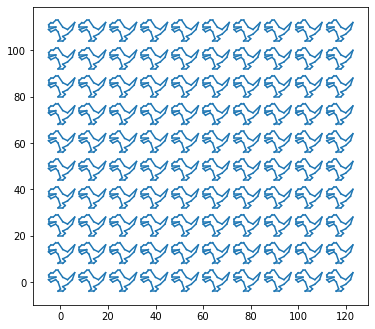

In [127]:
# make 100 dinos 

def hundred_dinos():
    translations = [(x * 13, y * 12) 
                    for x in range(10)
                    for y in range(10)]
    dinos = [ Polygon(*translate(tv, *dino_vectors)) 
             for tv in translations ]
    
    draw(*dinos, grid=None, axes=None, origin=None)
    # scale it down
    # apply 

hundred_dinos()

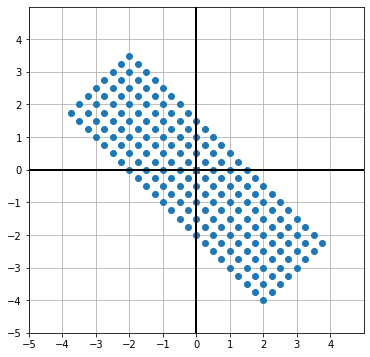

In [128]:
# Exercise 2.19−Mini Project: 
# Suppose z = (−1, 1) and v = (1, 1), and 
# suppose r and s are real numbers. Specifically, 

# let’s assume
# −3 < r < 3 and
# −1 < s < 1. 

# Where are the possible points on the plane where the vector
# r · u + s · v could end up?

def arange(start, stop, step = 0.1):
    if start >= stop:
        return 
    
    x = start
    
    while x < stop:
        yield x
        x+=step

def possible_vectors(): 
    u = (-1, 1)
    v = (1, 1)
    
    points = [
        add(scale(r, u), scale(s, v))
        for r in arange(-3, 3, 0.25)
        for s in arange(-1, 1, 0.25)

    ]
    draw(Points(*points, color=blue))
    
possible_vectors()


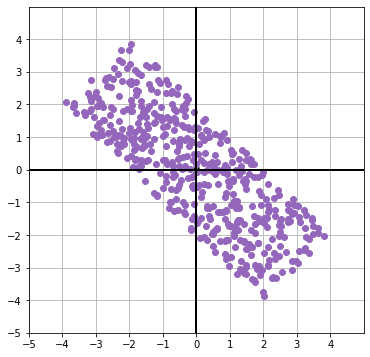

In [129]:
# the book has different / elegant solution to use `uniform`

from random import uniform 

def rand(a, b):
    def gen():
        return uniform(a, b)
    return gen

def book_possible_vectors():
    u = (-1, 1)
    v = (1, 1)
    
    rand_r = rand(-3, 3)
    rand_s = rand(-1, 1)

    points = [
        add(scale(rand_r(), u), scale(rand_s(), v))
        for i in range(500)
    ]
    draw(Points(*points, color=purple))
    
book_possible_vectors()
    
    

In [130]:
def subtract(v1, v2):
    # equal to v1 + (-v2)
    # v1.x - v2.x ... 
    
    return (v1[0] - v2[0], v1[1] - v2[1])

def test_subtract():
    v = (4, 3)
    u =  (-2, 8)

    r = add(v, u)
    
    print("u == subtract(r, v)", u == subtract(r, v))
    
test_subtract()
    

u == subtract(r, v) True


# Polar representation

Polar representation allow easy rotation and also scaling since it holds only the `(length, angle)`


In [140]:
from math import atan2, pi


def to_polar(v):
    x, y = v[0], v[1]
    angle = atan2(y, x)
    return (length(v), angle)


print("to_polar((4,4))[1] == pi/4", to_polar((4,4))[1] == pi/4)


0.7853981633974483
to_polar((4,4))[1] == pi/4 True


In [145]:
def to_cartesian(pv):
    l, angle = pv[0], pv[1]
    x = l * math.cos(angle)
    y = l * math.sin(angle)
    return (x, y)

v = (4, 3)
to_cartesian(to_polar(v)) == v

True

# rotate the dino


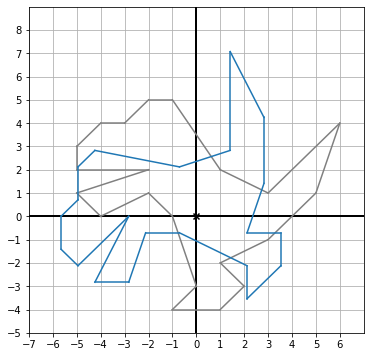

In [153]:
# to rotate the dino, convert dino_vector to polar, then add the angle

def rotate(pv, angle):
    return (pv[0], pv[1] + angle)

rotated_dino = [ 
    to_cartesian(
        rotate(
            to_polar(v), pi/4
        )
    ) for v in dino_vectors]

draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*rotated_dino, color=blue)
)